<a href="https://colab.research.google.com/github/Pawan-Kumar-Sahu/ML-Library-1/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import stats
import math
%matplotlib inline

In [0]:
d= pd.read_csv('mnist_train_small.csv',header=None)
data=np.array(d)
print (data)
Y = data[:,0]
print (Y)
X = data[:,1:]
print (X)

[[6 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
[6 5 7 ... 2 9 5]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
class knn():
  
  def prediction(self,xt_index):
    dist=np.sqrt(np.sum(np.square(self.x-self.xt[xt_index]),axis=1))
    a=np.array([dist,self.y]).T
    sort_a=[]
    for j,i in enumerate(np.argsort(a[:,0])):
        sort_a.append(a[i])
        if j==self.k-1:
            break
    if self.typ=='reg':
        p=(np.mean(np.array(sort_a)[:,1]))
    if self.typ=='cla':
        p=(stats.mode(np.array(sort_a)[:,1])[0][0])
    return p
  
  def train(self,x,y):
    self.x=x
    self.y=y
    self.m=self.x.shape[0]
    self.n=self.x.shape[1]

  def test(self,xt,yt,k,typ):
    self.xt=xt
    self.yt=yt
    self.k=k
    self.typ=typ
    self.mt=self.xt.shape[0]
    self.nt=self.xt.shape[1]
    self.pred=[]
    for i in range(self.mt):
      self.pred.append(self.prediction(i))
    return self.pred
    
  def score(self):
    v=self.yt-self.pred
    accu=np.count_nonzero(v==0)
    print("accuracy is ",(accu/len(v))*100,"%")
    
  def graph(self):
    i=1
    x_axis=[]
    y_axis=[]
    while i<22:
        u=self.test(self.xt[:100,:],self.yt[:100],i,self.typ)
        v=self.yt[:100]-self.pred
        accu=(np.count_nonzero(v==0)/len(v))*100
        x_axis.append(i)
        y_axis.append(accu)
        i=i+2
    plt.plot(x_axis,y_axis)
    plt.xlabel("K values")
    plt.ylabel("Accuracy")
    plt.title("Varying Accuracy wrt K")
    plt.show()


obj=knn()
obj.train(X,Y)


In [0]:
d_new= pd.read_csv('mnist_test.csv',header=None)
data_new=np.array(d_new)
print (data_new)
Y_new = data_new[:100,0]
print (Y_new)
X_new = data_new[:100,1:]
print (X_new)
prediction= obj.test(X_new,Y_new,5,typ='cla')
print(prediction)
obj.score()


[[7 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[7.0, 2.0, 1.0, 0.0, 4.0, 1.0, 4.0, 9.0, 5.0, 9.0, 0.0, 6.0, 9.0, 0.0, 1.0, 5.0, 9.0, 7.0, 3.0, 4.0, 9.0, 6.0, 6.0, 5.0, 4.0, 0.0, 7.0, 4.0, 0.0, 1.0, 3.0, 1.0, 3.0, 4.0, 7.0, 2.0, 7.0, 1.0, 2.0, 1.0, 1.0, 7.0, 4.0, 1.0, 3.0, 5.0, 1.0, 2.0, 4.0, 4.0, 6.0, 3.0, 5.0, 5.0, 6.0, 0.0, 4.0, 1.0, 9.0, 5.0, 7.0, 8.0, 9.0, 3.0, 7.0, 4.0, 6.0, 4.0, 3.0, 0.0, 7.0, 0.0, 2.0, 7.0, 1.0, 7.0, 3.0, 7.0, 9.0, 7.0, 7.0, 6.0, 2.0, 7.0, 8.0, 4.0, 7.0, 3.0, 6.0, 1.0, 3.0, 6.0, 4.0, 3.0, 1.0, 4.0, 1.0, 7.0, 6.0, 9.0]
accuracy is  96.0 %


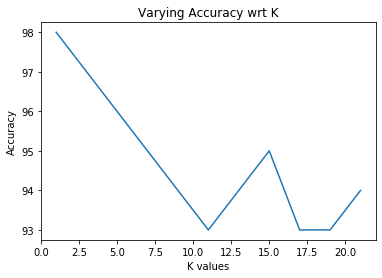

In [0]:
obj.graph() 